#Mounting Path

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Assignment


#Importing paths

In [2]:
import sys
import os 
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#Read COCO JSON File

In [6]:
fptr = open('CocoData/via_export_coco.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


#Extract Details

In [9]:
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,500,364,5b6cd4e739d95d260290c3578a86b7cf.jpg,1,
1,1,1000,799,55_1400x.jpg,1,
2,2,425,422,71bSvPgSGHL._AC_SX425_.jpg,1,
3,3,365,478,084e211d9d2616da4b8856ee0ab1048c.jpg,1,
4,4,219,182,220px-PomeranianJPG.jpg,1,


In [8]:
annotations_df.head()

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[141, 41, 413, 41, 413, 256, 141, 256]",58480,"[141, 41, 272, 215]",0
1,1,1,"[295, 168, 721, 168, 721, 773, 295, 773]",257730,"[295, 168, 426, 605]",0
2,2,2,"[22, 7, 380, 7, 380, 413, 22, 413]",145348,"[22, 7, 358, 406]",0
3,3,3,"[5, 29, 362, 29, 362, 403, 5, 403]",133518,"[5, 29, 357, 374]",0
4,4,4,"[11, 8, 207, 8, 207, 179, 11, 179]",33516,"[11, 8, 196, 171]",0


#Merging important data

In [15]:
imp_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_ = []
y_ = []
w_ = []
h_ = [] 
for row in range(imp_df.shape[0]):
  x_.append(imp_df['bbox'][row][0])
  y_.append(imp_df['bbox'][row][1])
  w_.append(imp_df['bbox'][row][2])
  h_.append(imp_df['bbox'][row][3])
box_df = pd.DataFrame(list(zip(x_, y_, w_, h_)), columns =['x', 'y', 'box_width', 'box_height'])
imp_df = pd.concat([imp_df, box_df], 1)
imp_df = imp_df.drop('bbox', axis =1)
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,5b6cd4e739d95d260290c3578a86b7cf.jpg,500,364,141,41,272,215
1,55_1400x.jpg,1000,799,295,168,426,605
2,71bSvPgSGHL._AC_SX425_.jpg,425,422,22,7,358,406
3,084e211d9d2616da4b8856ee0ab1048c.jpg,365,478,5,29,357,374
4,220px-PomeranianJPG.jpg,219,182,11,8,196,171


#Normalize

In [16]:
imp_df['x'] = imp_df['x'] / imp_df['width']
imp_df['y'] = imp_df['y'] / imp_df['height']
imp_df['box_width'] = imp_df['box_width'] / imp_df['width']
imp_df['box_height'] = imp_df['box_height'] / imp_df['height']
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,5b6cd4e739d95d260290c3578a86b7cf.jpg,500,364,0.282000,0.112637,0.544000,0.590659
1,55_1400x.jpg,1000,799,0.295000,0.210263,0.426000,0.757196
2,71bSvPgSGHL._AC_SX425_.jpg,425,422,0.051765,0.016588,0.842353,0.962085
3,084e211d9d2616da4b8856ee0ab1048c.jpg,365,478,0.013699,0.060669,0.978082,0.782427
4,220px-PomeranianJPG.jpg,219,182,0.050228,0.043956,0.894977,0.939560


#Taking only boxwidth and boxheight

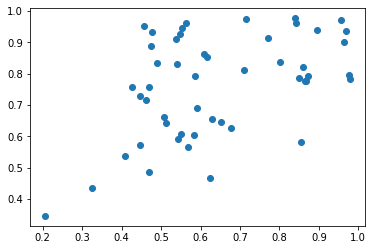

In [17]:
imp_stripped = imp_df[["box_width", "box_height"]].to_numpy()
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])

#Elbow Method

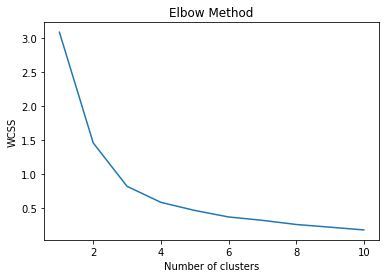

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(imp_stripped)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#clustering using 3 - means algo
Although elbow method points out at 4 clusters, by visualization 3 clusters look better option

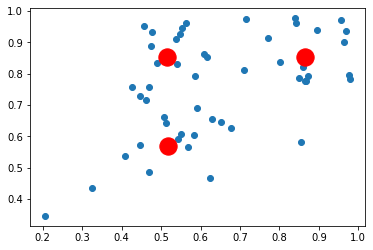

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(imp_stripped)
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()